# Project: Linear Regression

#### Name: Alexander Davenport

In this project, we will perform a standard regression analysis on two datasets. In order to complete this project, you should fill out all the blank spots in this notebook, and submit the notebook when you're done.  The blank cells throughout are already in their proper mode (markdown or code).  If you need more than one cell, go ahead and make them!  If you want to add commentary somewhere I didn't specifically ask for it, go ahead and add a markdown cell.  I just didn't want you to feel like you "had to fill out three boxes" just because when I was doing this, I made three cells in that spot.  Also, don't forget to use the Jupyter notebook environment to your advantage!  Add some working cells (press `a` or `b` in command mode to make a new cell _above_ or _below_ the current cell, respectively) for you to play around with building up a command, then remove them when you're done with that section (I usually just cut the cell with `x`). 

### Datasets
The datasets are taken from the book An Introduction to Statistical Learning, which is freely available online.  The datasets are as follows.  To learn more about the second dataset, look for it in [this pdf](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf).  It contains a bunch of descriptions of datasets.  I've outlined the way to describe a dataset below, and you should do the same for the Auto dataset

* Advertising: A collection of 200 datapoints consisting of the following variables/columns:
 * `Sales`: sales of a particular item in different markets, in thousands of units,
 * `TV`, `Radio`, `Newspaper`: advertising budgets of each media type, in the corresponding market, in thousands of dollars.
* Auto: [Your description here]

### Machine-Learning language: Modeling, and Predictors versus Response

When attempting to construct any statistical or machine learning model, there is always a goal.  Often people say they want to "fit the data", but that's a bit vague.  The goal is to create a _model_ that approximates some real phenomenon.  A model is a function that takes in some data about the world around it and makes a decision based on that data.  So when you're given a dataset, you need to decide which variables are inputs, and which are outputs.  Typically, this amounts to selecting one variable/column to be the output variable, or the __response__.  All the other variables are called __predictors__, or __features__.  They're the inputs.  The response is often easy to determine, because it tends to be answer to the question: "What can this dataset help me to determine?".  For example:

* In the Advertising dataset, the response is `Sales`, and the predictors are `Radio`, `TV`, and `Newspaper`.

Now it's your turn.  I'll do the hard part, you do the easy part:

* In the Auto dataset, the response is `horsepower`, and the predictors are [Your answer here]

Side note: It's definitely possible to have multiple responses, and that often means you just have one model for each, none of which use any of the responses.  We won't be doing much of that, at least not for now. 

### Using your own model versus Scikit-Learn

Throughout the past couple of days, you've been building a Linear Regression class.  You can feel free to use that if you want for this project.  I'm planning on you wanting to not use it, and to use someone else's very-carefully-thought-out-and-tested class.  This comes from the library Scikit-Learn.  Scikit-Learn is a library of machine learning models, and it has almost all of what you might think of in "classical" machine learning.  You'll see it in the import statements as `sklearn`, and it's a big library, so you typically import only what you need.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression ## Woah!  A new one!

%matplotlib inline

## Part 1: Advertising

### Load the dataset

Our first task is to load the data and make sure it has no missing information.  Then call `head()` on the dataset to make sure it loaded appropriately.

In [3]:
df = pd.read_csv("Advertising.csv",index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


I noticed when I loaded it that pandas added indices when the dataset already had them as the first column.  You can fix that by adding the keyword argument `index_col=0` to the call to `pd.read_csv`.  Side note: you can use `shift + tab` to get a description of the command in question, and `tab` to bring up options for tab completion.

Now, use the method `isnull` to check if any element is `NaN` in the dataset.  Remember, you can use boolean logic to slice the dataset! Try each of these out to see the effect that have: 
* `df[2:5]`
* `df[['TV','Radio']]`
* `df[2:5,['TV','Radio']]` DOES NOT WORK
* `df.loc[2:5,['TV','Radio']]`
* `df[some-boolean-function]`, such as `df.isnull()`

You'll notice that with pandas commands, you're method-chaining like a boss: the command I need to check for "is any element in a given row `NaN`?" is built as follows.  Do each of these in a blank cell to see what I mean by this!  Replace the previous call by the next one, as it begins to shape your data the way you want.  Finally, when you've built the exact command you want, copy it out of that "working space" cell and into the one you want.  I promise following along with this will help you understand how to do it!

1. I first use `df.isnull()` and see that it returns a copy of my dataframe where every element is replaced with `True` or `False`.  Helpful, but not exactly what I want.
1. I realize I want to "sum" these across the row, so I add a call to `any`, making the command `df.isnull().any()`. It produces a pandas Series object with `False` in every entry.  (Note that I'm done here, because no column contains an `NaN`, so no row does either.  But let's see how to finish building the command I set out to build: checking the rows).
1. I realize the `any` method is "summing" the columns, not the rows, so I need to change the `axis` keyword, making the command `df.isnull().any(axis=1)`.  This gives me a pandas Series with either `False` or `True` for each row.
1. I complete this command by feeding the previous one in as a boolean slicing command, by changing it to: `df[df.isnull().any(axis=1)]`.  This returns a dataframe with the only rows being those that contain `NaN`.

In [4]:
df[df.isnull().any(axis=1)]

#df[2:5]
#df[['TV','Radio']]
#df.loc[2:5,['TV','Radio']]
#df[df.isnull()]

,TV,Radio,Newspaper,Sales


### Summary Statistics and Visualizing the data
 
The next step in a standard data analysis is to take some summary statistics and visualizations.  You already know how to produce summary statistics (like mean, quartiles, _etc._), and a _histogram_ of each column of the data (`.hist()` will help).  What is a histogram, anyways?  Describe in a markdown cell below what you're seeing!

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


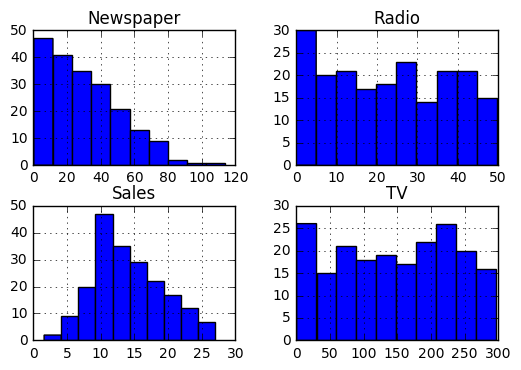

In [5]:
df.hist()
df.describe()

It is a distribution of occurances for each value in a column. For example, the number of times 10 TVs shows up.

Next, create some scatter plots of each of the predictors against the response (three total plots).  Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) on `df.plot()`.

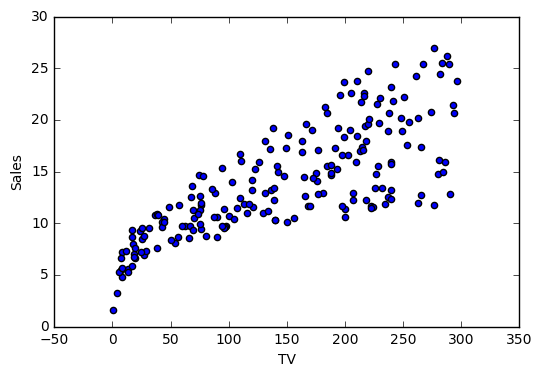

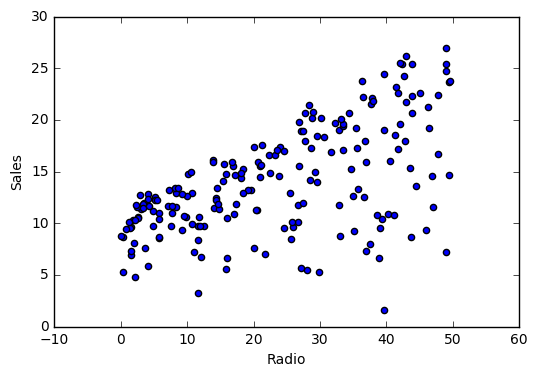

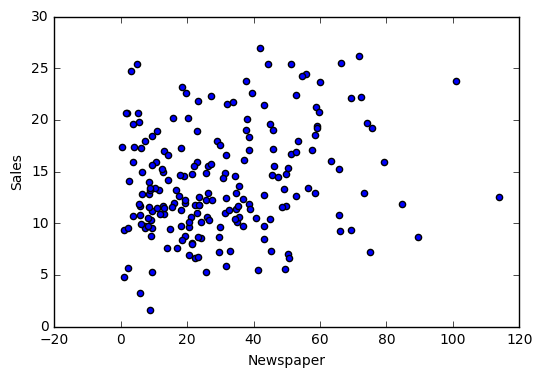

In [6]:
p1 = df.plot(y='Sales',x='TV',kind='scatter')
p2 = df.plot(y='Sales',x='Radio',kind='scatter')
p3 = df.plot(y='Sales',x='Newspaper',kind='scatter')

What are your thoughts from this?  Do you suspect some variables will be better than others at predicting `Sales`?

Newspaper seems to be a terrible predictor. TV and radio are good but they aren't perfect, there is some external factor.

### Produce the model

We discussed how `Sales` is our response variable, so create `X` and `y` numpy arrays accordingly.  Note you don't have to worry about extending the `X` matrix by a column of ones, the fitting function takes care of that for you.  I'll add the standard Scikit-learn commands here, since you've likely never seen them before.

In [7]:
# Slice the dataframe!
y = df['Sales']
X = df[['TV','Radio','Newspaper']]

In [8]:
# run me!
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

There are a few things we can do with this model.  We can see what this model has as useful attributes.  Here we're hiding what's in the list of attributes that are _under-the-hood_ things, by removing those with a leading underscore.  (See how useful naming conventions are?)

In [10]:
# run me!
print(*[item for item in dir(model) if item[0]!="_"], sep='\n')
print(model.intercept_)

coef_
copy_X
decision_function
fit
fit_intercept
get_params
intercept_
n_jobs
normalize
predict
rank_
residues_
score
set_params
singular_
2.93888936946


Check out some of these and see what they do.  Anything in scikit-learn that has a trailing underscore is used to mean the same as the "hat" in statistics: $\widehat{y}$ is an estimate of $y$.  Figure out how to get from the model everything you may want.  Remember to use `shift + tab` if it helps!  Some useful things are:
* Model parameters (the coefficients of your "line".  The proper term for "line" here is _hyperplane_, by the way.  I'll know what you mean if you say "line", but I recommend getting used to saying _model_).  
* The y-intercept is somewhere else away from those parameters
* You can even get the $R^2$ from this model!

#### Visualizing the model

Now that we have a model and understand how to access its parameters, we want to graph our data and see how it looks.  There's a problem though: we created a 3-dimensional hyperplane in 4-dimensional space.  (_"Wait, whaaa-?"_)  We can't see in four dimensions.  To help you understand this, write down the equation of the model that you just created.  It should be something like $\widehat{y} = b + m_1 x_1+...$, where the $m_i$ are your model parameters and the $x_i$ are the predictors.  Once you've done that, you can just plug in zero for all-but-one of the predictors to get the equation of a line.  Doing this for each variable gives you plenty of lines to work with. Those lines are something we can visualize!

To do so, recreate each of your "predictor versus response" scatter plots below, and add the corresponding line to that plot.  

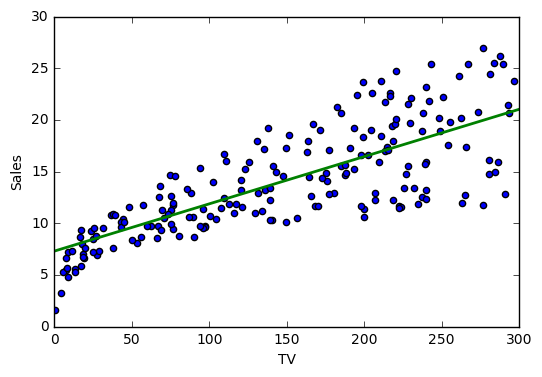

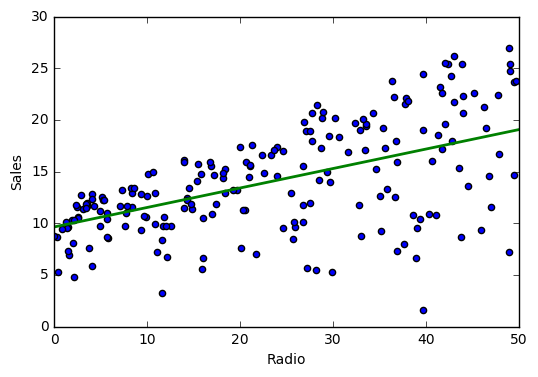

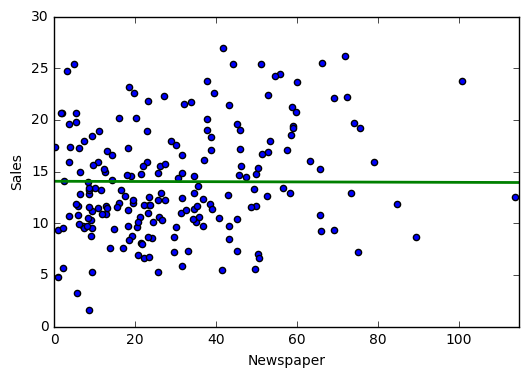

In [11]:
#PLT 1
m = model.coef_[0]
b = (model.intercept_)+(model.coef_[1]*df['Radio'].mean())+(model.coef_[2]*df['Newspaper'].mean())
line = (b,m)
p1 = df.plot(y='Sales',x='TV',kind='scatter')
p1.axis([0,300,0,30])
plt.plot([0, 300], [line[0], line[0] + 300* line[1]], color='g', linestyle='-', linewidth=2)

#PLT 2
m = model.coef_[1]
b = (model.intercept_)+(model.coef_[0]*df['TV'].mean())+(model.coef_[2]*df['Newspaper'].mean())
line = (b,m)
p2 = df.plot(y='Sales',x='Radio',kind='scatter')
p2.axis([0,50,0,30])
plt.plot([0, 50], [line[0], line[0] + 50* line[1]], color='g', linestyle='-', linewidth=2)

#PLT 3
m = model.coef_[2]
b = (model.intercept_)+(model.coef_[1]*df['Radio'].mean())+(model.coef_[0]*df['TV'].mean())
line = (b,m)
p3 = df.plot(y='Sales',x='Newspaper',kind='scatter')
p3.axis([0,115,0,30])
plt.plot([0, 115], [line[0], line[0] + 115* line[1]], color='g', linestyle='-', linewidth=2)

Describe what you're seeing.  How is this different from fitting a line to one dimension?  

We are seeing each predictor plotted against sales with the corresponding trend line for each model. We are fitting one model to all three predictors at once.

### Removing variables that are not predictive

There are some variables that are not as correlated with `Sales` as others.  As people living in an age of ubiquitous statistics, you've probably got an intuitive understanding of correlation, but perhaps you don't have a working definition of it.  Check out the Wikipedia page on the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).  You want the "For a sample" section.  It's a surprisingly big equation for such a simple idea.  Try to make sense of the pieces of the equation.

To verify our suspicion that some predictors are worse than others, create the correlation matrix on your dataframe.  Here's some helpful [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html).

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


What are you seeing?  What's on the diagonal?  ("The" diagonal of a matrix is always the upper-left to lower-right diagonal.  Yes, I know that a rectangle has two diagonal lines, the other one just tends to not matter for us.) What's above versus below the diagonal?  What makes a highly correlated value? What makes a poorly correlated value?

We are seeing a correlation between two columns in the dataframe. On the diagonal we are seeing values correlated with themselves, so the correlation is perfect. Above and below are mirrored across the diagonal. A well correlated pair of values co-vary with each other whether it be inversely, proportionally or otherwise.

To determine whether we should actually remove some variable or not, we need some good numbers.  Confusingly, those numbers are called "statistics".  The field of Statistics is called that because it is the study of statistics.

We already know a good statistic for discussing whether a particular model fits the data well or not: the $R^2$, or "Coefficient of Determination".  Now that you're experts of fitting linear regression models, do this: fit a linear regression model for all possible choices of predictors (0, 1, 2, or all 3 of them), and compute the $R^2$ for each. 

_Side note_: One helpful tool for doing this kind of thing comes from the `itertools` library in Python. This library gives you awesome ways of taking some iterator (for example, a list) and changing it around.  The one you want here is the [combinations](https://docs.python.org/3/library/itertools.html#itertools.combinations) tool.  Check it out in action:

In [16]:
# run me!
from itertools import combinations, chain

my_list = [2,3,4]

for i in chain(combinations(my_list,n) for n in range(len(my_list) +1)):
    print(*i)

()
(2,) (3,) (4,)
(2, 3) (2, 4) (3, 4)
(2, 3, 4)


However, this is definitely overkill for your current situation.  The number of potential models is $2^3 = 8$, so you should just list them out.  This would be easier than using `chain` and `combinations`.  Just know that tools like these exist! In general, if you have $p$ predictors, then the number of potential models is $2^p$. _(end Side note)_

In [58]:
from itertools import combinations, chain

my_list = ['TV','Radio','Newspaper']

combs = [i for i in chain(combinations(my_list,n) for n in range(len(my_list) +1))]

r2vals = []

for comb in combs:
    for c in comb:
        if len(c) > 0:
            xc = df[list(c)]
            modelc = LinearRegression()
            modelc.fit(xc,y)
            r2vals.append((list(c),modelc.score(xc,y)))
print(r2vals)

[(['TV'], 0.61187505085007099), (['Radio'], 0.33203245544529525), (['Newspaper'], 0.052120445444305163), (['TV', 'Radio'], 0.89719426108289557), (['TV', 'Newspaper'], 0.64583549382932715), (['Radio', 'Newspaper'], 0.33270518395032256), (['TV', 'Radio', 'Newspaper'], 0.89721063817895208)]


Hopefully, you're not terribly happy with what you're seeing.  Describe the way that the $R^2$ term is affected by going from a model with some predictors to one containing more.

It is more accurate with more predictors with variation based on how correlated each predictor is.

One possible solution is to change the $R^2$ to compensate for this increase in parameters.  Check out the [Adjusted $R^2$ section of the $R^2$ wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2).

Redo the above analysis with the adjusted $R^2$ below:

In [65]:
preds = ['TV','Radio','Newspaper']

combs = [i for i in chain(combinations(preds,n) for n in range(len(preds) +1))]

r2adj = {}

for comb in combs:
    for c in comb:
        if len(c) > 0:
            xc = df[list(c)]
            modelc = LinearRegression()
            modelc.fit(xc,y)
            r2 = modelc.score(xc,y)
            r2adj[", ".join(list(c))] = r2 - (1-r2)*(len(c)/(xc.shape[0]-len(c)-1))
print(max(r2adj, key=r2adj.get))

TV, Radio


Now choose the model with the best score.  What it is?  Is it what you expected?

I expected TV, Radio to be the right predictors as newspaper did not seem to have correlation and the other two did.

There are tons of ways to do this analysis.  What you just did, by the way, is called a "Best Subset Selection": you looked through all possible subsets of the predictors and chose the one with the best possible test statistic, for which you used adjusted $R^2$.  There are plenty of other possible test statistics you could have used. Also, since $2^p$ grows extremely fast as $p$ does, you quickly become unable to test all the model options as your datasets grow.  Thus best subset selection becomes prohibitively expensive, and you'll need a better way to choose which predictors to include in your model.  The answer is often not "all of them!".

### Predictions

One of the best uses for building statistical/machine-learning models is for their predictive power.  You've _trained_ a model on this _training_ dataset, and it gave you out a function in its predictors.  Now you can plug in some values for the predictors and get some predictions!

Do that now: use `linreg.predict` with some values plugged in.  How about 10 different values: 7 within the ranges of the variables, and 3 that are _extrapolations_, meaning they venture out of the ranges of the variables.  

In [72]:
modelp = LinearRegression()
modelp.fit(df[['TV','Radio']],y)

pred_in = np.array([[10,163],[20,274],[30,98],[40,63],[15,288],[25,191],[45,275],[57,400],[60,14],[69,107]])
modelp.predict(pred_in)

array([ 34.021707  ,  55.34661431,  22.71717857,  16.59492879,
        57.74975941,  39.97186757,  56.67847891,  80.72681502,
         8.29830799,  26.1935644 ])

## Part 2: Auto

### Categorical versus continuous data
So far, all the data we've seen has been _quantitative_, or _continuous_ data.  It would make sense to add, say, 25 to one of the variables.  Another type of data that comes up very often is _qualitative_ or _categorical_ data.  This is data that fits into a (typically, but not necessarily) small number of categories, or options.  Think "female or male", or "sedan, coupe, SUV, or truck", or something similar.  These types of data are often extremely useful!  But the difficulty comes when we try to turn them into numbers.

There are two common things we could try to do.  

1. We could use pandas incredibly powerful `groupby` method to split the data into groups given by a categorical column.  For example, I could group your class's statistics into "seniors" and "non-seniors", and perform a different analysis on each to try to see if senioritis is a thing at Phillips Academy.  
1. Another thing you can do is "just send it into your model" when you fit it.  That has a ton of benefits, because you're essentially doing the above option for all your categorical variables simultaneously.  It does, however, require that your data has been "binarized".  That's a cool word, how do you pronounce it?  It's "bine-are-ized", because you're taking your categorical variables and making them 0 or 1.  So you pick "male is 0, female is 1" or vice versa.  

Binarizing is easy when the data is naturally binary; but what if your categorical variable has more than two categories?  You need to create enough binary variables to account for all your categories.  If you have four categories, perhaps "red", "yellow", "blue", and "black", you would create three binary variables: 
 * one for "red" (0 or 1), 
 * one for "yellow" (0 or 1), 
 * one for "blue" (0 or 1), and 
 * "black" counts as zero for each of the others.  

This gets a little weird (what if you entered 1 for blue and 1 for black in the same data point?), but it's much better than the alternative of a single variable of 0, 1, 2, or 3.  Why?  The reason is that the difference between any two categories should be treated as the same.  Suppose you assigned them as "red is 0, blue is 1, green is 2, and black is 3". Then you are telling your model that some categories are more different from each other than others.  "black" minus "red" is 3, but "black" minus "green" is 1.  That difference is significant, and will have hugely negative effects on your predictive power.

For this dataset, the only categorical variable is `origin`, relating to the origin of the car.  Read through the documentation on the dataset (the pdf at the top of the notebook) to understand what it is, and binarize appropriately.

### Your turn

Perform the same analysis that you just did above.  Yes, all of it!  Some notes/caveats: 

* Feel free to skip any "for teaching purposes only" things, like testing the non-adjusted $R^2$ on each model.  
* There are some missing data in this dataset.  That's something we didn't deal with above, because we didn't have any missing data.  Again, I'll simply state that the problem of what to do with missing data is a big one.  The simple, "cop out" solution is to replace all the missing values with the median of the column.  Since this project is already on the long side, just do that.  You can use `df.loc[row_index,"column_name"]` to set individual entries. 
* It's an interesting question to determine how to utilize `name`.  _You should just not include it in your analysis_.  But it might be useful, in general: you could strip out the manufacturer from the name and have that be another categorical variable (that you would need to binarize).  Feel free to do that if you want extra practice.
* $2^7 = 128$, so fitting 128 models may take a while!  Get it running on a subset of them, and then time it to see how long it should take to do the whole thing.  If it's going to take a while, then run it and go do something else for a bit!  This is where the chain and combinations thing from above may come in handy, by the way. 

In [4]:
#take in data
df2 = pd.read_csv("Auto.csv")

#remove NaNs and replace with median
df2.fillna(df2.median(), inplace=True)

#remove whitespace
df2.columns = [c.strip() for c in df2.columns]

#binarize country of origin
makes = pd.get_dummies(df2['origin'])
makes.columns = ['American', 'European', 'Japanese']
df2[['American', 'European', 'Japanese']] = makes

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,American,European,Japanese
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",1.0,0.0,0.0


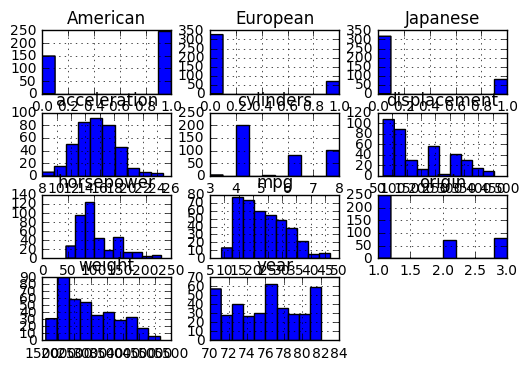

In [5]:
#snapshot of data
df2.hist()
df2.head()
#df2.describe()

In [6]:
#global variables
ay = df2['horsepower']
apreds = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'American', 'European', 'Japanese']

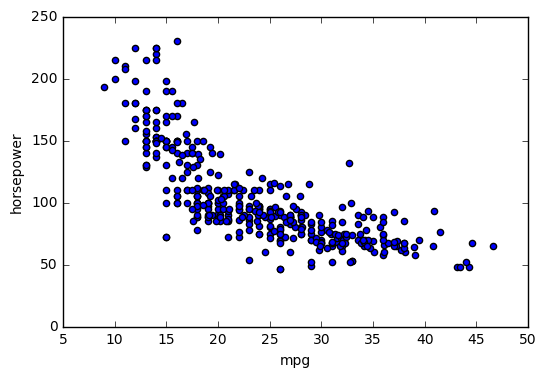

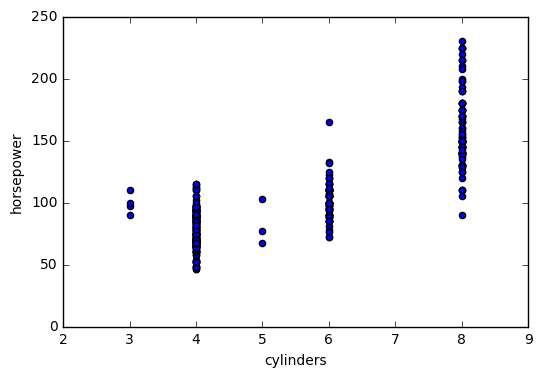

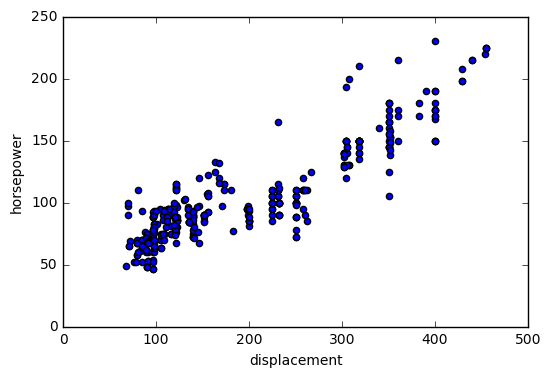

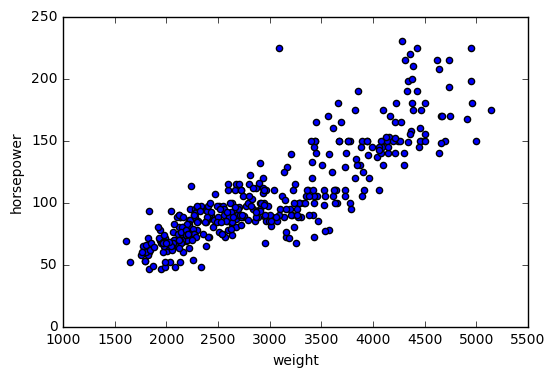

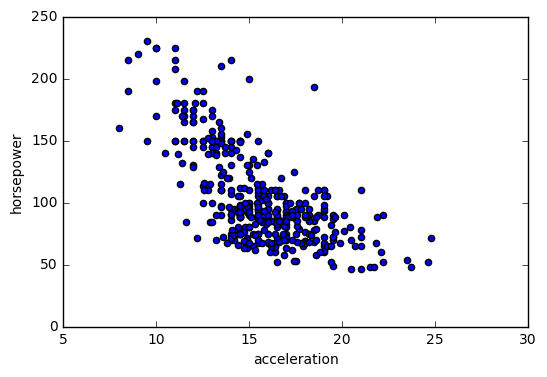

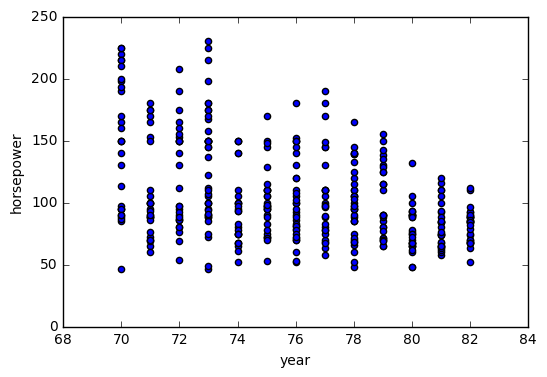

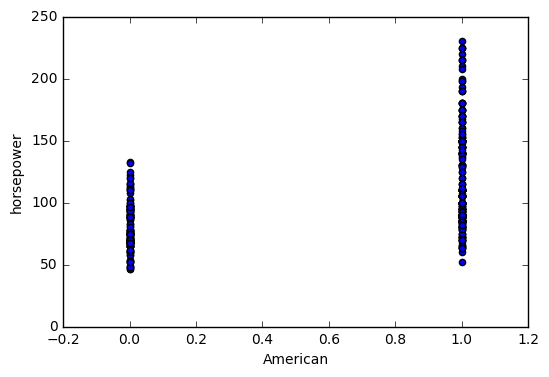

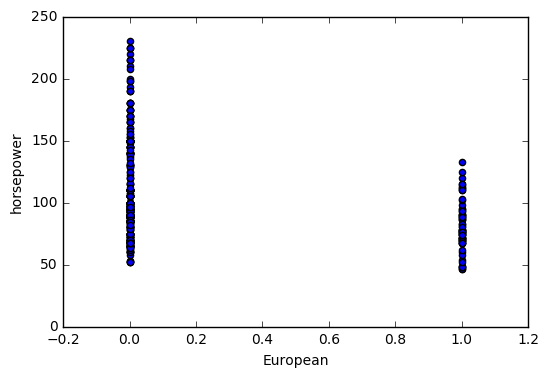

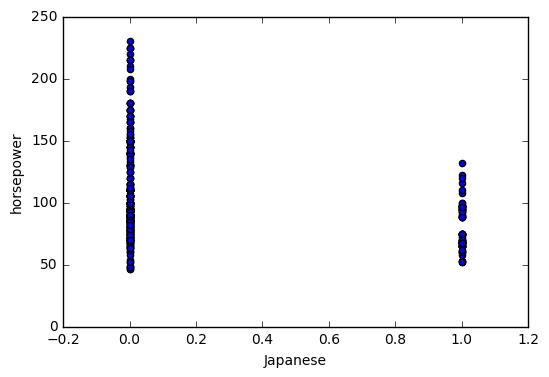

In [7]:
#scatter plots
for p in apreds:
    df2.plot(y='horsepower',x=p,kind='scatter')

In [15]:
from itertools import combinations, chain

combs = [i for i in chain(combinations(apreds[:-1],n) for n in range(len(apreds[:-1]) +1))] #all posible combinations, leaving out Japanese because binary
r2adj = {}
count = 0

#run through each model and add adjusted r2 to dictionary with model name
for comb in combs:
    for c in comb:
        count += 1
        if len(c) > 0:
            xc = df2[list(c)]
            modelc = LinearRegression()
            modelc.fit(xc,ay)
            r2 = modelc.score(xc,ay)
            r2adj[", ".join(list(c))] = r2 - (1-r2)*(len(c)/(xc.shape[0]-len(c)-1))
            print("Testing Model %s: %s" % (count, ", ".join(list(c))))
        else:
            print("Empty Model Skipped")

#display results
print("-------------------------------------------------------------\nBest Model: " + max(r2adj, key=r2adj.get))
model_string =  max(r2adj, key=r2adj.get)
print("R2: %s" % r2adj[model_string])

Empty Model Skipped
Testing Model 2: mpg
Testing Model 3: cylinders
Testing Model 4: displacement
Testing Model 5: weight
Testing Model 6: acceleration
Testing Model 7: year
Testing Model 8: American
Testing Model 9: European
Testing Model 10: mpg, cylinders
Testing Model 11: mpg, displacement
Testing Model 12: mpg, weight
Testing Model 13: mpg, acceleration
Testing Model 14: mpg, year
Testing Model 15: mpg, American
Testing Model 16: mpg, European
Testing Model 17: cylinders, displacement
Testing Model 18: cylinders, weight
Testing Model 19: cylinders, acceleration
Testing Model 20: cylinders, year
Testing Model 21: cylinders, American
Testing Model 22: cylinders, European
Testing Model 23: displacement, weight
Testing Model 24: displacement, acceleration
Testing Model 25: displacement, year
Testing Model 26: displacement, American
Testing Model 27: displacement, European
Testing Model 28: weight, acceleration
Testing Model 29: weight, year
Testing Model 30: weight, American
Testing M

In [10]:
#fit best model
auto_model = LinearRegression()
auto_model.fit(df2[model_string.split(", ")],ay)

#predict 1982 delorean dmc-12
#real is 130
delorean = np.array([6,173.3,2718,9,82,0,1]).reshape(1, -1)
print("Predicted HP: %s" % auto_model.predict(delorean)[0])

Predicted HP: 121.756086964
